<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

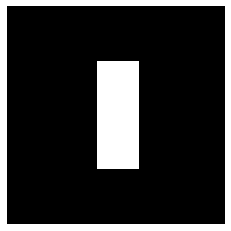

In [26]:
img = cv2.imread('../imgs/Rectangle.png',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
plt.imshow(img,cmap='gray')  
plt.axis('off')
plt.show()

True

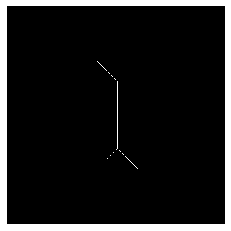

In [27]:
ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
        
plt.imshow(skel,cmap='gray')
plt.axis('off')
cv2.imwrite('../outputImg/skeletonRectangle.png', skel) 
